In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read data
df = pd.read_csv('Social_Network_ads.csv')
print("Data imported")

Data imported


In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = df.iloc[:,[2,3]].values
X.shape

(400, 2)

In [5]:
y = df.iloc[:,-1]
y.shape

(400,)

In [6]:
#obtain test_train datasets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

print('X_train\n',X_train.shape)
print('X_test\n',X_test.shape)
print('y_train\n',y_train.shape)
print('y_train\n',y_test.shape)

X_train
 (280, 2)
X_test
 (120, 2)
y_train
 (280,)
y_train
 (120,)


C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
#Apply standard scaler as Salary has huge gap
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("X is scaled")

X is scaled


C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Using Linear Kernel

In [8]:
#Fitting the SVC model
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', random_state=0)
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
y_pred = clf.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[75,  4],
       [12, 29]], dtype=int64)

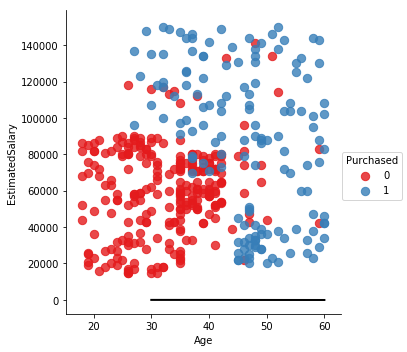

In [11]:
#Visualise the results using Seaborn
import seaborn as sns

# Get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Plot the hyperplane
sns.lmplot('Age', 'EstimatedSalary', data=df, hue='Purchased', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

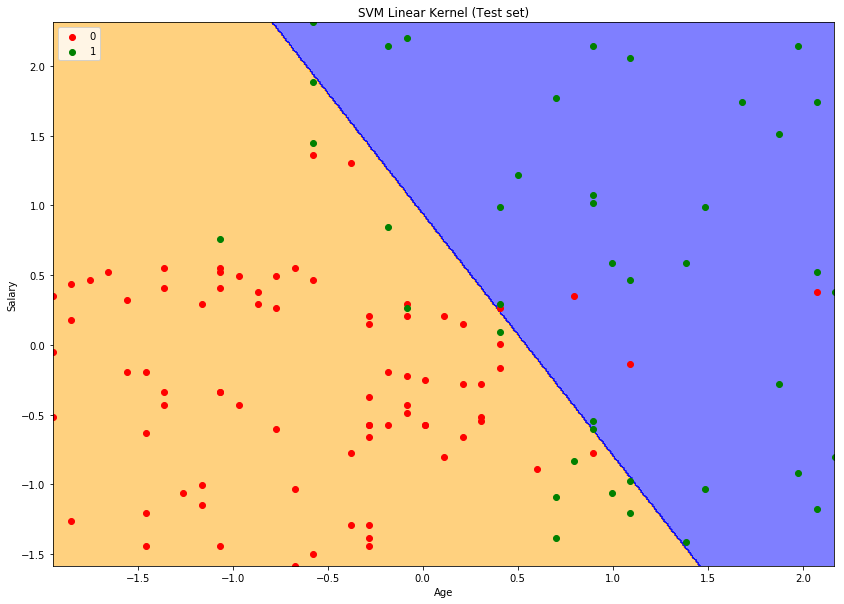

In [12]:
# Visualising the Test set results
plt.figure(figsize = (14,10))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
 
aranged_ages = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_salaries = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_ages, aranged_salaries)
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
     alpha = 0.5, cmap = ListedColormap(('orange', 'blue')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Linear Kernel (Test set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

#### Parameter Tuning using GridSearchCV

- The module sklearn.model_selection allows us to do a grid search over parameters using GridSearchCV. 
- All we need to do is specify which parameters we want to vary and by what value. 
- The parameters C and gamma are varied. 
- Every combination of C and gamma is tried and the best one is chosen. 
- The best estimator can be accessed using clf.best_estimator_.


- **By default, GridSearchCV performs 3-fold cross-validation. **
- In other words, it divides the data into 3 parts and uses two parts for training, and one part for determining accuracy. 
- This is done three times so each of the three parts is in the training set twice and validation set once. The accuracy for a given C and gamma is the average accuracy during 3-fold cross-validation.

In [13]:
# Grid Search
from sklearn.model_selection import GridSearchCV
#from sklearn import svm
"""
parameter_candidates = [ {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},]
"""
# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [10,1,0.1, 0.01, 0.001, 0.00001]}

#param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [10,1,0.1, 0.01, 0.001, 0.00001], 'kernel':['linear','rbf','poly','sigmoid']}
#Making system super slow 

# Create a classifier object with the classifier and parameter candidates
clf_grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, n_jobs=-1)

# Train the classifier on data1's feature and target data
#clf.fit(data1_features, data1_target)   
 
# Train the classifier
clf_grid.fit(X_train, y_train)
 
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)
# View the accuracy score
print('Best score for data:', clf_grid.best_score_) 

Best Parameters:
 {'C': 1, 'gamma': 1}
Best Estimators:
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best score for data: 0.9214285714285714


### Using Poly kernel

In [14]:
#Fitting the SVC model
from sklearn.svm import SVC
clf = SVC(kernel = 'poly', random_state=0) #degree = 3 default
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[77,  2],
       [17, 24]], dtype=int64)

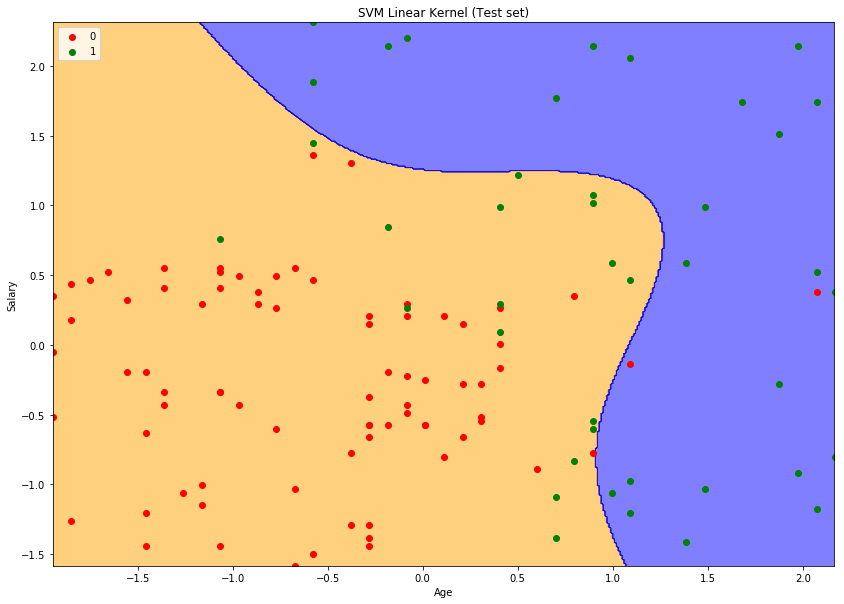

In [17]:
# Visualising the Test set results
plt.figure(figsize = (14,10))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
 
aranged_ages = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_salaries = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_ages, aranged_salaries)
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
     alpha = 0.5, cmap = ListedColormap(('orange', 'blue')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Linear Kernel (Test set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

### Using RBF kernel

In [18]:
#Fitting the SVC model
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', random_state=0) #degree = 3 default
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[72,  7],
       [ 4, 37]], dtype=int64)

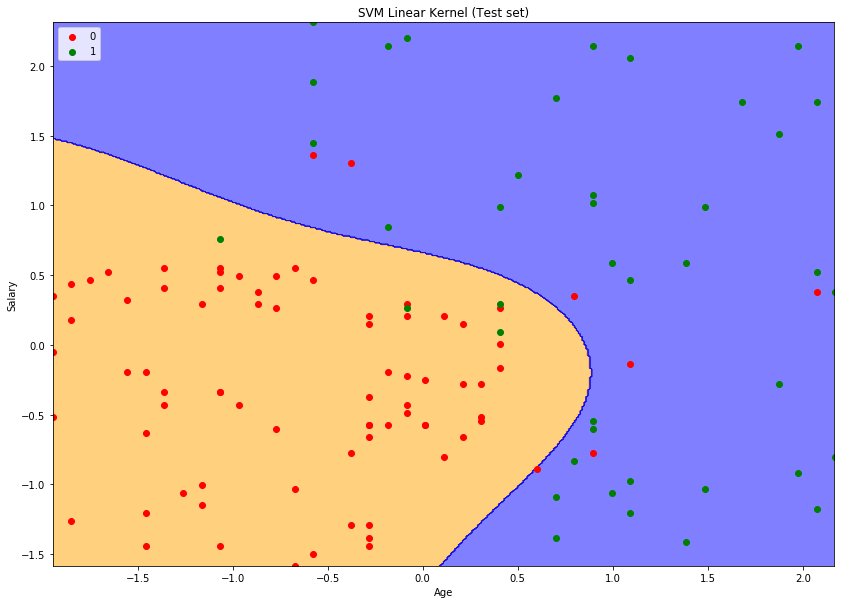

In [21]:
# Visualising the Test set results
plt.figure(figsize = (14,10))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
 
aranged_ages = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_salaries = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_ages, aranged_salaries)
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
     alpha = 0.5, cmap = ListedColormap(('orange', 'blue')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Linear Kernel (Test set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

### Using Sigmoid Kernel

In [22]:
#Fitting the SVC model
from sklearn.svm import SVC
clf = SVC(kernel = 'sigmoid', random_state=0) #degree = 3 default
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
y_pred = clf.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[65, 14],
       [17, 24]], dtype=int64)

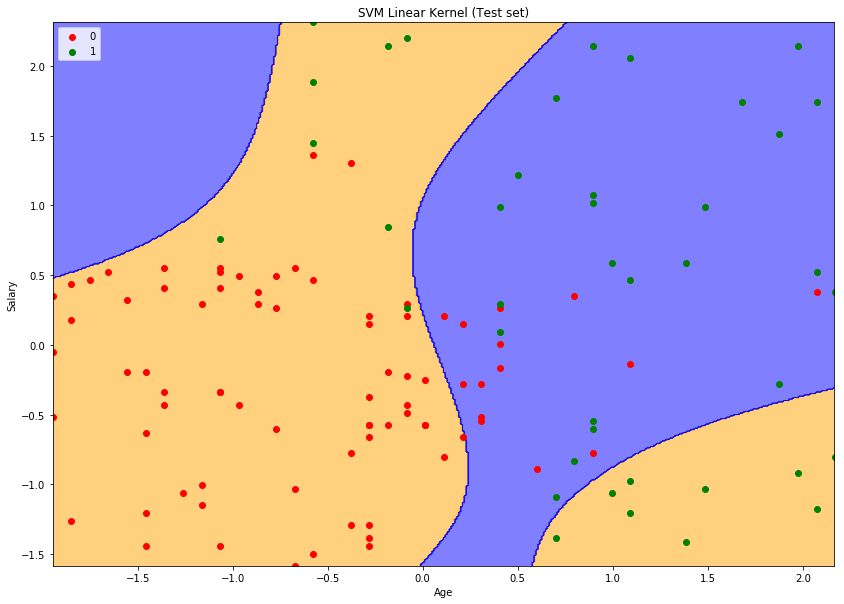

In [25]:
# Visualising the Test set results
plt.figure(figsize = (14,10))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
 
aranged_ages = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_salaries = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_ages, aranged_salaries)
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
     alpha = 0.5, cmap = ListedColormap(('orange', 'blue')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Linear Kernel (Test set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

** Improved accuracy for RBF**  (in this class)

** RBF > Linear > Poly > Sigmoid **